In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("existence_label.csv")

In [3]:
df1

,row_num,rater1,rater2,rater3,rater4,rater5,rater6,rater7,rater8,rater9,...,i_TA,s/he_TA,they_TA,we_TA,you_TA,num_ratings,mturk_rating,apology,Brand,Label
0,1,20,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022727,0.000000,0.000000,0.090909,0.068182,3,20.333333,True,Marriot,1
1,2,10,-30.0,-22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005155,0.000000,0.000000,0.067010,0.061856,3,-14.000000,False,Marriot,0
2,3,20,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.014085,0.000000,0.000000,0.084507,0.098592,4,27.500000,True,Marriot,1
3,4,30,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.023256,0.000000,0.000000,0.093023,0.058140,4,30.000000,True,Marriot,1
4,5,30,30.0,5.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.055046,0.000000,0.000000,0.009174,0.082569,4,23.750000,True,Marriot,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,896,30,30.0,30.0,30.0,20.0,30.0,NaN,NaN,NaN,...,0.037736,0.000000,0.009434,0.009434,0.056604,6,28.333333,True,Al Bahar,1
776,897,20,-20.0,30.0,16.0,9.0,30.0,-9.0,NaN,NaN,...,0.039088,0.006515,0.009772,0.019544,0.052117,7,10.857143,True,enVision,1
777,898,9,30.0,30.0,30.0,20.0,30.0,21.0,30.0,30.0,...,0.013158,0.000000,0.000000,0.052632,0.078947,11,26.272727,True,enVision,1
778,899,-9,30.0,27.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.024390,0.000000,0.000000,0.024390,0.085366,4,19.500000,True,enVision,1


In [8]:
df1["response"]

0      Dear Alisunshine20,Welcome to New York City an...
1      Dear SeaTurtle01,Thank you for choosing us for...
2      Dear Dolcevitax,We are delighted to hear that ...
3      Dear DFWtrave,I'm very sorry for your poor exp...
4      Hi @rugwag,Thank you very much for taking the ...
                             ...                        
775    Hi,Our hotel is typically lauded for its fast ...
776    We're sorry to hear that you were disappointed...
777    Greetings Mary B:On behalf of the management a...
778    Greetings Harpist77,Thank you for taking the t...
779    hr1313,Thank you very much for sharing your ex...
Name: response, Length: 780, dtype: object

In [9]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import lucem_illud
import gensim
import sklearn
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams

In [10]:
#tokenize and normalize the word
df1['tokenized_words'] = df1['response'].apply(lambda x: lucem_illud.word_tokenize(x))
df1['normalized_words'] = df1['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

/opt/anaconda3/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/opt/anaconda3/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [11]:
df1

,row_num,rater1,rater2,rater3,rater4,rater5,rater6,rater7,rater8,rater9,...,they_TA,we_TA,you_TA,num_ratings,mturk_rating,apology,Brand,Label,tokenized_words,normalized_words
0,1,20,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.090909,0.068182,3,20.333333,True,Marriot,1,"[Dear, Alisunshine20,Welcome, to, New, York, C...","[dear, alisunshine20,welcome, new, york, city,..."
1,2,10,-30.0,-22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.067010,0.061856,3,-14.000000,False,Marriot,0,"[Dear, SeaTurtle01,Thank, you, for, choosing, ...","[dear, seaturtle01,thank, choosing, recent, tr..."
2,3,20,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.084507,0.098592,4,27.500000,True,Marriot,1,"[Dear, Dolcevitax, We, are, delighted, to, hea...","[dear, dolcevitax, delighted, hear, enjoyed, m..."
3,4,30,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.093023,0.058140,4,30.000000,True,Marriot,1,"[Dear, DFWtrave, I'm, very, sorry, for, your, ...","[dear, dfwtrave, sorry, poor, experience, hote..."
4,5,30,30.0,5.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.009174,0.082569,4,23.750000,True,Marriot,1,"[Hi, @rugwag, Thank, you, very, much, for, tak...","[hi, @rugwag, thank, taking, time, feedback, w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,896,30,30.0,30.0,30.0,20.0,30.0,NaN,NaN,NaN,...,0.009434,0.009434,0.056604,6,28.333333,True,Al Bahar,1,"[Hi, Our, hotel, is, typically, lauded, for, i...","[hi, hotel, typically, lauded, fast, wifi, fri..."
776,897,20,-20.0,30.0,16.0,9.0,30.0,-9.0,NaN,NaN,...,0.009772,0.019544,0.052117,7,10.857143,True,enVision,1,"[We, 're, sorry, to, hear, that, you, were, di...","[sorry, hear, disappointed, recent, stay, opin..."
777,898,9,30.0,30.0,30.0,20.0,30.0,21.0,30.0,30.0,...,0.000000,0.052632,0.078947,11,26.272727,True,enVision,1,"[Greetings, Mary, B, On, behalf, of, the, mana...","[greetings, mary, b, behalf, management, staff..."
778,899,-9,30.0,27.0,30.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.024390,0.085366,4,19.500000,True,enVision,1,"[Greetings, Harpist77,Thank, you, for, taking,...","[greetings, harpist77,thank, taking, time, sha..."


In [730]:
df1.to_csv("existence_tokenized.csv")

In [14]:
df1.Label.value_counts()

1    519
0    261
Name: Label, dtype: int64

In [15]:
df1.Brand.value_counts()

Hilton               180
Unaffiliated         131
Marriot               85
Marriot               70
Intercontinental      63
Hyatt                 40
Wyndham               31
Sheraton              23
Choice                21
Best Western          19
BLVD                  12
Staypineapple         11
Starwood              11
Executive              8
Club Quarters          8
Silver Cloud           8
Radisson               4
Vagabond Inn           4
RFR                    4
WHR                    4
Al Bahar               4
Conrad                 4
enVision               4
360 Degree             4
Carvi                  4
Broadway Plaza         4
Columbus               3
Greystone              3
Decade                 3
Interstate             3
AJ Capital             2
Ramtoka                2
Affinia                2
Al Faisal              1
Name: Brand, dtype: int64

In [13]:
#generate a corpus containing all documents
corpus = []
label = []
for index, row in df1.iterrows():
    corpus.append(row["response"])
    label.append(row["Label"])

In [341]:
corpus

["Dear Alisunshine20,Welcome to New York City and thank you for choosing us to be your hotel to experience the city for the first time. Our goal is to exceed our guests' expectations so I regret that you found us to be lacking in a couple of aspects of your stay. We appreciate you recognizing our strengths while providing us with some areas of opportunity. I hope we have the chance to better serve you on a future visit.Sincerely,Craig KeppleGeneral Manager",
 'Dear SeaTurtle01,Thank you for choosing us for your recent trip to New York. We appreciate you taking the time to post a review on your experience with us so that we can continue to put our best foot forward and continue creating great experiences for the guests of our hotel. After speaking with several members of our management team we have looked into your issue and verified that the rates that you were charged were indeed the rates that you originally booked. There were no changes at all to your reservation since the time of b

In [16]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.parsing.preprocessing import preprocess_documents
import gensim.corpora as corpora

In [17]:
preprocessed_texts = preprocess_documents(corpus)
dictionary = Dictionary(preprocessed_texts)
corpus_transform = [dictionary.doc2bow(text) for text in preprocessed_texts]

In [18]:
# an example which set number of topics at 10
ldamodel = LdaModel(corpus=corpus_transform, num_topics=10, id2word=dictionary)

In [732]:
ldamodel.print_topics(num_words = 20)

[(0,
  '0.020*"thank" + 0.014*"sorri" + 0.013*"stai" + 0.009*"enjoi" + 0.009*"hear" + 0.009*"hotel" + 0.008*"manag" + 0.008*"staff" + 0.008*"feedback" + 0.007*"share" + 0.006*"time" + 0.006*"hope" + 0.006*"best" + 0.006*"like" + 0.006*"review" + 0.006*"area" + 0.006*"guest" + 0.005*"glad" + 0.005*"experi" + 0.005*"team"'),
 (1,
  '0.034*"thank" + 0.022*"feedback" + 0.020*"stai" + 0.017*"servic" + 0.014*"apolog" + 0.014*"hope" + 0.013*"guest" + 0.013*"time" + 0.012*"review" + 0.011*"hotel" + 0.010*"experi" + 0.010*"dear" + 0.010*"provid" + 0.009*"hear" + 0.008*"take" + 0.008*"share" + 0.007*"manag" + 0.007*"expect" + 0.007*"team" + 0.007*"offer"'),
 (2,
  '0.025*"thank" + 0.024*"guest" + 0.022*"stai" + 0.017*"hope" + 0.017*"hotel" + 0.016*"feedback" + 0.016*"time" + 0.012*"servic" + 0.012*"experi" + 0.011*"dear" + 0.011*"sorri" + 0.010*"review" + 0.009*"provid" + 0.008*"manag" + 0.008*"team" + 0.008*"apolog" + 0.008*"sincer" + 0.007*"appreci" + 0.007*"best" + 0.007*"share"'),
 (3,
  '0.

In [39]:
#coherence values
from gensim.models import CoherenceModel
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=42,
                                           alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_texts, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [532]:
#coherence values of an example when the number of topic is 5
compute_coherence_values(corpus=corpus_transform, dictionary=dictionary, k=5, a=0.001, b=0.001)

0.44943877321952097

--------------

#### hyper-parameter tunning to see the coherence value of different combinations of hyper-parameter

In [41]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus_transform, int(num_of_docs*0.75)), 
               corpus_transform]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|█████████████████████████████████████████| 540/540 [54:54<00:00,  6.10s/it]


In [42]:
model_results

{'Validation_Set': ['75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75% Corpus',
  '75%

### Here, we tried different number of topics (1-30 topics) to find that the later logistic classification prediction has highest accuracy when the number of topics is 20 

In [700]:
lda_model = gensim.models.LdaMulticore(corpus=corpus_transform,
                                           id2word=dictionary,
                                           num_topics=20, #try different number of topics to find the best prediction performance
                                           random_state=42,
                                           alpha=0.001,
                                           eta=0.001)

In [701]:
lda_model.print_topics(num_words=25, num_topics = 20)

[(0,
  '0.035*"stai" + 0.018*"guest" + 0.018*"thank" + 0.017*"time" + 0.017*"hotel" + 0.017*"feedback" + 0.016*"servic" + 0.015*"experi" + 0.015*"room" + 0.014*"hope" + 0.012*"take" + 0.012*"apolog" + 0.011*"appreci" + 0.011*"recent" + 0.009*"staff" + 0.009*"chanc" + 0.009*"expect" + 0.008*"share" + 0.008*"provid" + 0.008*"disappoint" + 0.007*"review" + 0.007*"hear" + 0.007*"improv" + 0.007*"offer" + 0.007*"issu"'),
 (1,
  '0.038*"stai" + 0.037*"thank" + 0.025*"time" + 0.022*"hotel" + 0.022*"feedback" + 0.020*"guest" + 0.019*"take" + 0.014*"experi" + 0.014*"appreci" + 0.014*"hope" + 0.012*"dear" + 0.012*"share" + 0.012*"recent" + 0.010*"review" + 0.009*"enjoi" + 0.009*"hear" + 0.008*"futur" + 0.008*"apolog" + 0.008*"room" + 0.007*"servic" + 0.007*"sincer" + 0.007*"like" + 0.007*"comment" + 0.006*"team" + 0.006*"look"'),
 (2,
  '0.027*"thank" + 0.019*"room" + 0.017*"hope" + 0.016*"feedback" + 0.016*"stai" + 0.014*"experi" + 0.013*"apolog" + 0.013*"time" + 0.012*"guest" + 0.011*"futur" +

In [736]:
#visualize topics 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(topic_model=lda_model, 
                              corpus=corpus_transform, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [702]:
compute_coherence_values(corpus=corpus_transform, dictionary=dictionary, k=20, a=0.001, b=0.001)

0.41224137206164546

### Use the probability distribution over different topics as feature vector for each piece of response

In [703]:
train_vecs = []
for i in range(len(df1)):
    top_topics = (
        lda_model.get_document_topics(corpus_transform[i],
                                      minimum_probability=0.0)
    )
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec)

In [704]:
len(train_vecs)

780

In [705]:
train_vecs 

[[2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  2.701677e-05,
  0.9994866,
  2.701677e-05,
  2.701677e-05],
 [1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  0.08789012,
  1.3334248e-05,
  0.4057725,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  0.4444747,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  1.3334248e-05,
  0.061649367],
 [3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  0.99938744,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05,
  3.224196e-05],
 [2.7767623e-05,
  2.7767623e-05,
 

In [706]:
df_top = pd.DataFrame(train_vecs, columns = ['t1', 't2', "t3", "t4","t5",'t6', 't7', "t8","t9","t10", 't11', 't12', "t13","t14","t15",'t16', 't17', "t18","t19","t20"])

In [707]:
df_top["label"] = label

In [358]:
from sklearn.model_selection import train_test_split

In [708]:
df_top_pos = df_top[df_top["label"] == 1]
df_top_neg = df_top[df_top["label"] == 0]

In [709]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(519, 21)


In [710]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [712]:
X_data = data_upsampled[['t1', 't2', "t3", "t4","t5",'t6', 't7', "t8","t9","t10", 't11', 't12', "t13","t14","t15", 't16', 't17', "t18", "t19","t20"]]# ,"t4","t5",'t6', 't7', "t8","t9","t10" ,"t4","t5",'t6', 't7', "t8","t9","t10", 't11', 't12', "t13","t14","t15",'t16', 't17', "t18","t19","t20"
y_data = data_upsampled['label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [713]:
X_data

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
0,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.999487,0.000027,0.000027
2,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.999387,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032
3,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.999472,0.000028,0.000028,0.000028,0.000028
4,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.999487,0.000027,0.000027
6,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.366141,0.633409,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.000027,0.000027,0.000027,0.000027,0.999487,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
672,0.000125,0.000125,0.000125,0.997631,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125
723,0.000036,0.000036,0.000036,0.000036,0.999322,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036,0.000036
121,0.000331,0.993709,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331,0.000331


In [714]:
from sklearn.linear_model import LogisticRegression

In [715]:
#class_weight = "balanced"
lgclf = LogisticRegression(random_state=42, fit_intercept = False, solver = "liblinear", penalty ="l1").fit(X_train, y_train) 

In [716]:
from sklearn.model_selection import cross_val_score

In [717]:
print(cross_val_score(lgclf, X_train, y_train, cv=10))

[0.65957447 0.55319149 0.64893617 0.65957447 0.50537634 0.56989247
 0.5483871  0.58064516 0.58064516 0.6344086 ]


In [718]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.7115384615384616


In [719]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[33, 19],
       [11, 41]])

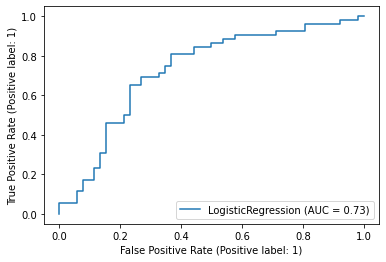

In [720]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [721]:
lgclf.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [722]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lgclf.coef_[0])

# preview
coeff_df.sort_values(by='Coefficient', inplace=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [723]:
df_feature

,Features,Coefficient
4,t5,-1.136555
1,t2,-0.802695
3,t4,-0.657704
7,t8,-0.263645
11,t12,-0.226551
5,t6,-0.090033
9,t10,-0.079379
13,t14,-0.059037
14,t15,-0.051096
6,t7,-0.029141


In [724]:
df_f0

,Features,Coefficient
0,t1,0.0
2,t3,0.0
10,t11,0.0


In [727]:
df_feature_vec = pd.DataFrame(df_top, columns = ['t1', 't2', "t3", "t4","t5",'t6', 't7',"t8","t9","t10", 't11', 't12', "t13","t14","t15", 't16', 't17', "t18", "t19","t20"])

In [728]:
df_feature_vec 

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
0,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.999487,0.000027,0.000027
1,0.000013,0.000013,0.000013,0.000013,0.087890,0.000013,0.405773,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.444475,0.000013,0.000013,0.000013,0.000013,0.061649
2,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.999387,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032
3,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.999472,0.000028,0.000028,0.000028,0.000028
4,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.999487,0.000027,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.999604,0.000021,0.000021,0.000021,0.000021,0.000021
776,0.686605,0.000009,0.313241,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
777,0.000032,0.000032,0.000032,0.000032,0.999387,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032
778,0.000029,0.000029,0.000029,0.000029,0.000029,0.999441,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029


In [729]:
df_feature_vec.to_csv("topic_model_ten_topics.csv")